In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [2]:
df = pd.read_csv("C:\\Users\\Hi\\Downloads\\train.csv",usecols = ['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [6]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [7]:
df['Age'].fillna(df['Age'].mean(),inplace = True)

In [8]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [9]:
x.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [10]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

C:\Users\Hi\AppData\Local\Temp\ipykernel_14880\133063659.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


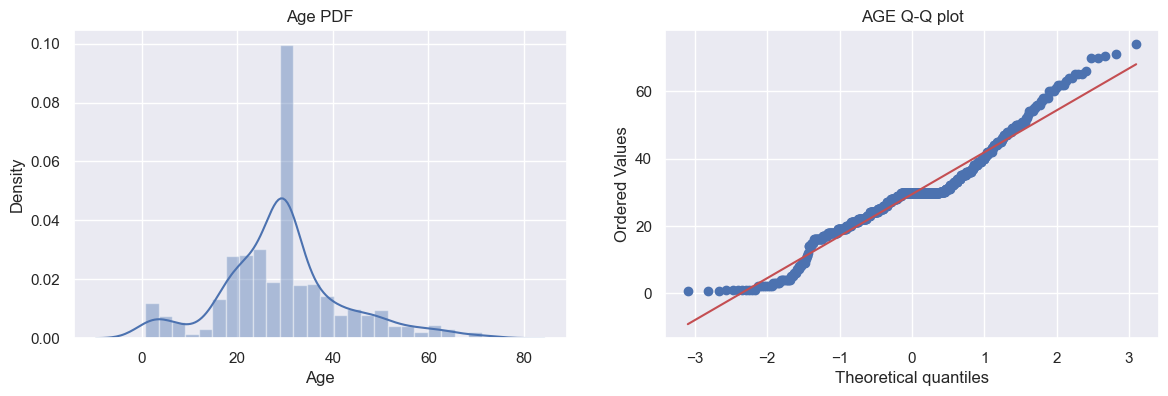

In [12]:


plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'],dist = 'norm',plot = plt)
plt.title('AGE Q-Q plot')

plt.show()

C:\Users\Hi\AppData\Local\Temp\ipykernel_14880\1059463506.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


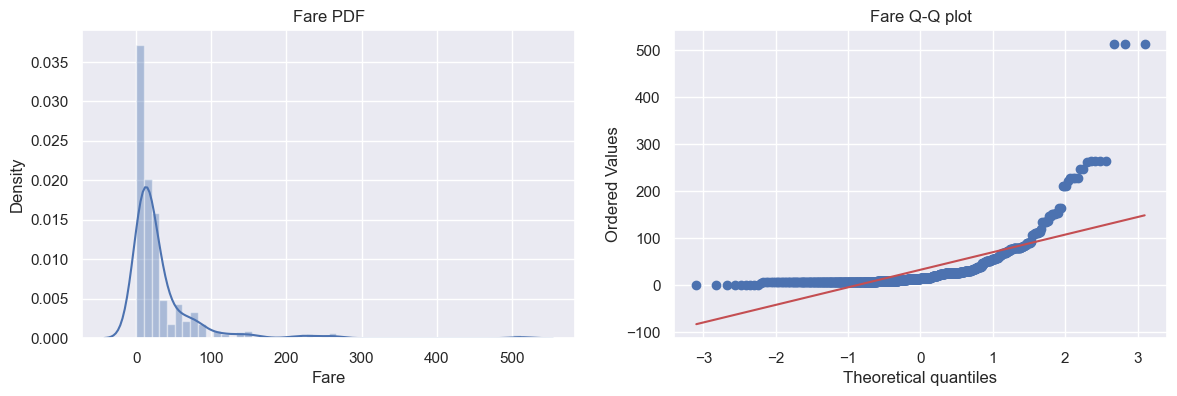

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist = 'norm',plot = plt)
plt.title('Fare Q-Q plot')

plt.show()

In [14]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(x_train,y_train)
y_pred_logit = clf1.predict(x_test)

clf2.fit(x_train,y_train)
y_pred_dt =clf2.predict(x_test)



In [15]:
print('Accuracy_score :',accuracy_score(y_test,y_pred_logit))

print('Accuracy_score :',accuracy_score(y_test,y_pred_dt))

Accuracy_score : 0.6759776536312849
Accuracy_score : 0.6201117318435754


## Transformation

In [16]:
trf = FunctionTransformer(func = np.log1p)


x_train_trandform = trf.fit_transform(x_train)
x_test_trandform = trf.fit_transform(x_test)

In [28]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(x_train_trandform,y_train)
y_pred_logit1 = clf1.predict(x_test_trandform)

clf2.fit(x_train_trandform,y_train)
y_pred_dt1 =clf2.predict(x_test_trandform)


In [29]:
print('Accuracy_score :',accuracy_score(y_test,y_pred_logit1))

print('Accuracy_score :',accuracy_score(y_test,y_pred_dt1))

Accuracy_score : 0.6927374301675978
Accuracy_score : 0.6145251396648045


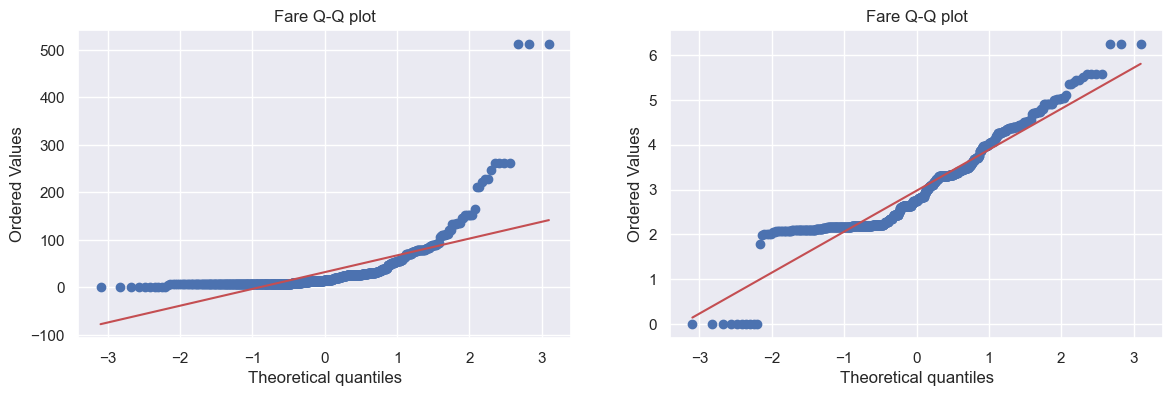

In [33]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Fare'],dist = 'norm',plot = plt)
plt.title('Fare Q-Q plot')

plt.subplot(122)
stats.probplot(x_train_trandform['Fare'],dist = 'norm',plot = plt)
plt.title('Fare Q-Q plot')

plt.show()